[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       201
           1       0.80      0.78      0.79       199

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



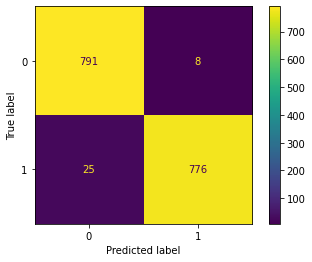

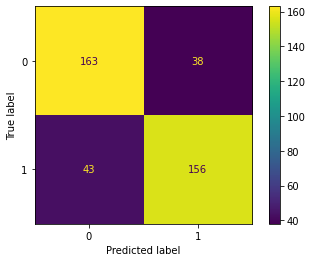

In [5]:
import pandas as pd

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt


data = pd.read_csv("/home/higoreller/projetos_pos/datasets/movie-pang02.csv")

vectorizer = CountVectorizer(stop_words='english')

vectorizer

X = vectorizer.fit_transform(data.text.tolist())

data['class'] = data['class'].apply(lambda s: int(s=='Pos'))

input = X.toarray()

print(input)

target = data['class'].values

X, X_test, y, y_test = train_test_split(input, target, test_size=0.20, random_state=42)

model = MultinomialNB()

model.fit(X, y)

model.score(X_test, y_test)

print(classification_report(y_test, model.predict(X_test)))

%matplotlib inline
ConfusionMatrixDisplay.from_estimator(model, X, y)

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)